# Analisis productos de Amazon


### Cargar base de datos


In [2]:
import pandas as pd

#cargando el data set

data_f = pd.read_csv('amazon_products.csv')


data_relation=pd.read_csv('amazon_categories.csv')

In [3]:
type(data_f)

pandas.core.frame.DataFrame

### Exploración del data frame

In [4]:
#revisando los nombres de las columnas
list(data_f.columns) 

['asin',
 'title',
 'imgUrl',
 'productURL',
 'stars',
 'reviews',
 'price',
 'listPrice',
 'category_id',
 'isBestSeller',
 'boughtInLastMonth']

In [5]:
#revisando las primeras 5 filas 
data_f.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


In [6]:
#información general : # de null por columna y tipo de dato en cada columna
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 110.2+ MB


In [7]:
data_f.describe()

,stars,reviews,price,listPrice,category_id,boughtInLastMonth
count,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06
mean,3.999512e+00,1.807508e+02,4.337540e+01,1.244916e+01,1.237409e+02,1.419823e+02
std,1.344292e+00,1.761453e+03,1.302893e+02,4.611198e+01,7.311273e+01,8.362720e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.100000e+00,0.000000e+00,1.199000e+01,0.000000e+00,6.500000e+01,0.000000e+00
50%,4.400000e+00,0.000000e+00,1.995000e+01,0.000000e+00,1.200000e+02,0.000000e+00
75%,4.600000e+00,0.000000e+00,3.599000e+01,0.000000e+00,1.760000e+02,5.000000e+01
max,5.000000e+00,3.465630e+05,1.973181e+04,9.999900e+02,2.700000e+02,1.000000e+05


Cambiando la columna de category_id (los números), por su equivalente usando el documento amazon_products

In [8]:
data_f = data_f.merge(data_relation, left_on='category_id', right_on='id',  how='left')
#list(data_f.columns) 


In [9]:
data_f.drop(columns={'id','category_id'}, inplace=True)



In [10]:

data_f.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,False,2000,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,False,1000,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,False,300,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,False,400,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,False,400,Suitcases


## Crear base de datos en SQL

In [11]:
import sqlite3

#Conectar con la base de datos. (En caso de que no exista, la creará)
conn = sqlite3.connect('amazonstore.db')

#Guardar el DataFrame en la base de datos como tabla
data_f.to_sql('Amaproduct', conn, if_exists='replace', index=False)

#Cerrar la conexión
conn.close()

### Análisis

Se lleva a cabo un análisis de los precios de los distintos productos según su categoría, así como la cantidad de best sellers en cada una. Además, se evalúa el número promedio de reseñas y estrellas por categoría. De este modo, es posible identificar cuál es la categoría más consumida y determinar si los precios de los productos se reflejan en sus ventas

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#Agrupar el precio por categoría
Price_by_category = data_f.groupby('category_name')['price'].sum().reset_index()
#Mostrando de mayor a menor
Price_by_category.sort_values(by='price',ascending=False)

,category_name,price
54,Computers & Tablets,4553201.97
137,Men's Shoes,1855241.35
138,Men's Watches,1581441.04
242,Women's Shoes,1181527.85
240,Women's Handbags,1060822.95
...,...,...
75,Gift Cards,3790.99
74,Garment Bags,3303.19
192,Smart Home Thermostats - Compatibility Checker,3285.33
202,Smart Home: Voice Assistants and Hubs,3232.91


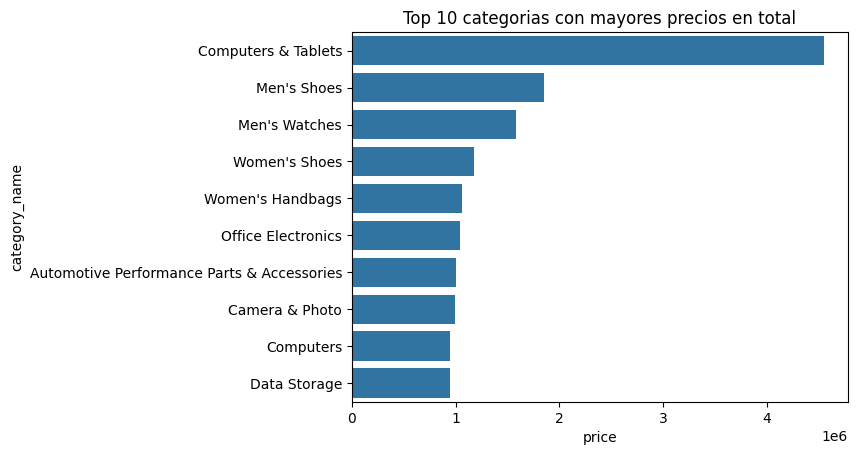

In [13]:
#Visualización precios
sns.barplot(x='price', y='category_name', data=Price_by_category.sort_values(by='price',ascending=False).head(10))
plt.title('Top 10 categorias con mayores precios en total')
plt.show()

Se procede a encontrar la categoría con más reviews. 

In [14]:
#Agrupar las reseñas por categoría (mostradas de mayor a menor)
reviews_by_category = data_f.groupby('category_name')['reviews'].sum().reset_index()
reviews_by_category.sort_values(by='reviews',ascending=False)


,category_name,reviews
92,Home Décor Products,17372441
132,Makeup,14429795
70,"Foot, Hand & Nail Care Products",14086149
214,Televisions & Video Products,13269924
228,Video Games,12085813
...,...,...
241,Women's Jewelry,0
242,Women's Shoes,0
245,"Xbox One Games, Consoles & Accessories",0
246,"Xbox Series X & S Consoles, Games & Accessories",0


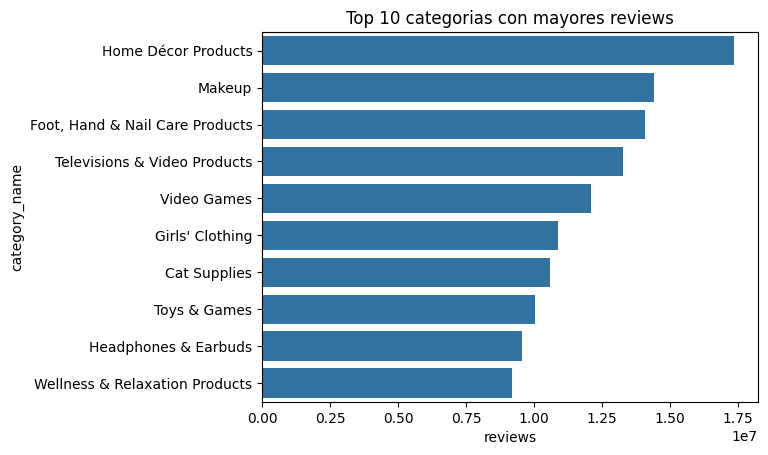

In [15]:
#Visualización precios
sns.barplot(x='reviews', y='category_name', data=reviews_by_category.sort_values(by='reviews',ascending=False).head(10))
plt.title('Top 10 categorias con mayores reviews')
plt.show()

Relacionando la cantidad de reviews con los precios por categoria

In [16]:
merge=pd.merge(left=Price_by_category ,right=reviews_by_category , how="inner", left_on='category_name', right_on='category_name')
merge.sort_values(by='price',ascending=False )

,category_name,price,reviews
54,Computers & Tablets,4553201.97,0
137,Men's Shoes,1855241.35,3294939
138,Men's Watches,1581441.04,0
242,Women's Shoes,1181527.85,0
240,Women's Handbags,1060822.95,6322447
...,...,...,...
75,Gift Cards,3790.99,0
74,Garment Bags,3303.19,0
192,Smart Home Thermostats - Compatibility Checker,3285.33,0
202,Smart Home: Voice Assistants and Hubs,3232.91,116572


Se observa que algunas categorías presentan un valor total de artículos muy alto, pero carecen de reseñas, lo que sugiere que la base de datos podría estar incompleta. A continuación, se calcula el promedio de estrellas por categoría y la cantidad de best sellers en cada una.

In [17]:
#Agrupar por el promedio de estrellas por categoría (mostradas de mayor a menor)
stars_by_category = data_f.groupby('category_name')['stars'].mean().reset_index()
stars_by_category.sort_values(by='stars',ascending=False)


,category_name,stars
75,Gift Cards,4.832374
86,Health & Household,4.567541
100,Industrial & Scientific,4.554726
98,Household Supplies,4.545314
119,Kitchen & Dining,4.544674
...,...,...
246,"Xbox Series X & S Consoles, Games & Accessories",1.934880
192,Smart Home Thermostats - Compatibility Checker,1.204545
230,Virtual Reality Hardware & Accessories,0.917241
112,Kids' Play Boats,0.742237


In [18]:
#Agrupar best seller por categoría (mostradas de mayor a menor)
bestseller_by_category = data_f.groupby('category_name')['isBestSeller'].sum().reset_index()
bestseller_by_category.sort_values(by='isBestSeller',ascending=False)

,category_name,isBestSeller
205,Sports & Fitness,483
100,Industrial & Scientific,404
10,Automotive Replacement Parts,368
119,Kitchen & Dining,279
207,Sports & Outdoors,259
...,...,...
204,"Sony PSP Games, Consoles & Accessories",0
230,Virtual Reality Hardware & Accessories,0
229,Video Projectors,0
227,Video Game Consoles & Accessories,0


Juntando todo en una sola tabla para facilitar el análisis.

In [19]:
merge2=pd.merge(left=merge ,right=stars_by_category , how="inner", left_on='category_name', right_on='category_name')
all_merge=pd.merge(left=merge2 ,right=bestseller_by_category , how="inner", left_on='category_name', right_on='category_name')
all_merge

,category_name,price,reviews,stars,isBestSeller
0,Abrasive & Finishing Products,210873.66,2808,3.489868,17
1,Accessories & Supplies,170639.12,0,4.419593,125
2,Additive Manufacturing Products,408830.01,967991,3.105893,7
3,Arts & Crafts Supplies,111877.35,5101102,4.221737,14
4,"Arts, Crafts & Sewing Storage",156679.07,0,3.152147,9
...,...,...,...,...,...
243,Women's Watches,534506.07,1715864,3.695628,3
244,"Xbox 360 Games, Consoles & Accessories",113378.87,18916,3.683697,10
245,"Xbox One Games, Consoles & Accessories",107441.06,0,3.885092,1
246,"Xbox Series X & S Consoles, Games & Accessories",144835.21,0,1.934880,4


In [20]:
all_merge.sort_values(by='isBestSeller',ascending=False).head(10)

,category_name,price,reviews,stars,isBestSeller
205,Sports & Fitness,178143.97,0,4.451996,483
100,Industrial & Scientific,88294.71,0,4.554726,404
10,Automotive Replacement Parts,199199.11,0,4.483158,368
119,Kitchen & Dining,128970.61,0,4.544674,279
207,Sports & Outdoors,77066.10,0,4.499774,259
217,Tools & Home Improvement,57883.34,0,4.462653,240
220,Toys & Games,620199.47,10020872,4.191442,240
239,Women's Clothing,611848.12,0,4.183384,164
152,Outdoor Recreation,102438.17,0,4.456028,150
12,Automotive Tools & Equipment,401365.51,7981819,4.404137,149


In [21]:
all_merge.sort_values(by='stars',ascending=False).head(10)

,category_name,price,reviews,stars,isBestSeller
75,Gift Cards,3790.99,0,4.832374,2
86,Health & Household,11074.05,0,4.567541,54
100,Industrial & Scientific,88294.71,0,4.554726,404
98,Household Supplies,32165.62,0,4.545314,51
119,Kitchen & Dining,128970.61,0,4.544674,279
69,Food Service Equipment & Supplies,133744.68,0,4.522902,50
62,Electrical Equipment,196385.90,0,4.518131,58
167,Power Tools & Hand Tools,142791.78,0,4.502181,48
207,Sports & Outdoors,77066.10,0,4.499774,259
63,Electronic Components,46317.26,0,4.487720,61


En las dos tablas anteriores (la primera organizada por best seller y la segunda por estrellas) se puede observar que en ambos casos, no hay reseñas; por lo que, se buscan las categorias en común entre los primeros 20 elementos de ambas tablas, para obtener las que tienen mas estrellas y mayor cantidad de bestseller.

In [22]:
pd1=all_merge.sort_values(by='isBestSeller',ascending=False).head(20)
pd2=all_merge.sort_values(by='stars',ascending=False).head(20)
top_categories=pd.merge(left=pd1 ,right=pd2 , how="inner")
top_categories

,category_name,price,reviews,stars,isBestSeller
0,Sports & Fitness,178143.97,0,4.451996,483
1,Industrial & Scientific,88294.71,0,4.554726,404
2,Automotive Replacement Parts,199199.11,0,4.483158,368
3,Kitchen & Dining,128970.61,0,4.544674,279
4,Sports & Outdoors,77066.10,0,4.499774,259
5,Tools & Home Improvement,57883.34,0,4.462653,240
6,Outdoor Recreation,102438.17,0,4.456028,150
7,Craft Supplies & Materials,125711.35,0,4.457496,107


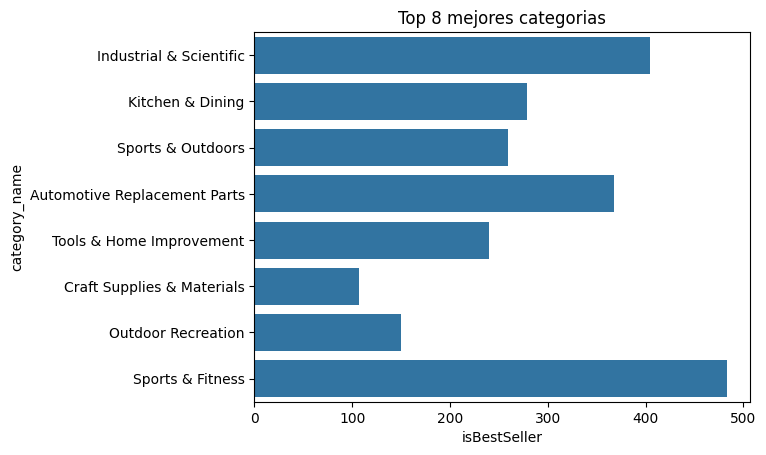

In [23]:
sns.barplot(x='isBestSeller', y='category_name', data=top_categories.sort_values(by='stars',ascending=False))
plt.title('Top 8 mejores categorias')
plt.show()

De la anterior tabla se puede ver que las primeras tres categorias (198, 162 y 21) son las que tienen mayor cantidad de productos best seller y también tienen un buen promedio de estrellas. 

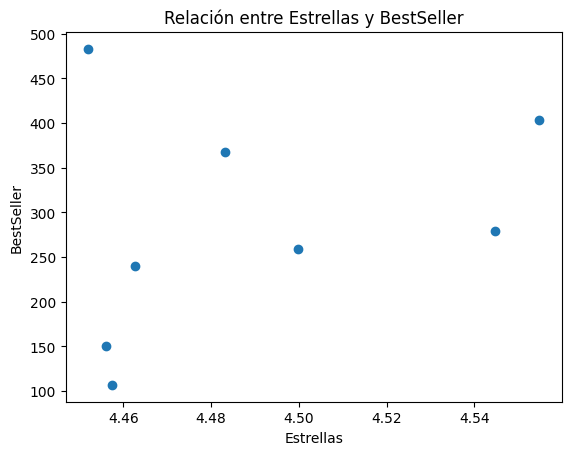

In [24]:
plt.scatter(top_categories['stars'], top_categories['isBestSeller'])
plt.title('Relación entre Estrellas y BestSeller')
plt.xlabel('Estrellas')
plt.ylabel('BestSeller')
plt.show()

Se puede ver que no hay una relación clara entre las categorias con mayor cantidad de productos bestSeller y el número de estrellas asociadas a estás.

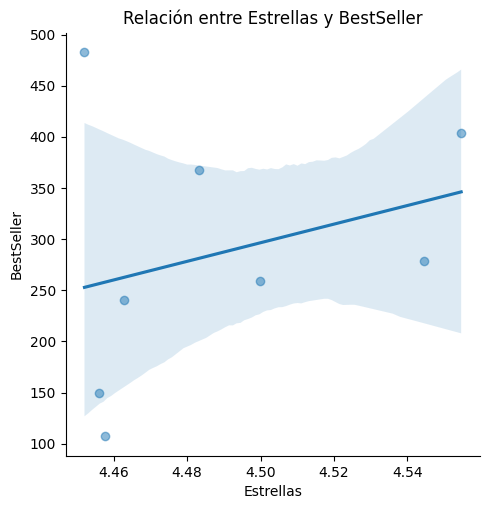

In [25]:
sns.lmplot(x='stars', y='isBestSeller', data=top_categories, scatter_kws={'alpha':0.5})
plt.title('Relación entre Estrellas y BestSeller')
plt.xlabel('Estrellas')
plt.ylabel('BestSeller')
plt.show()

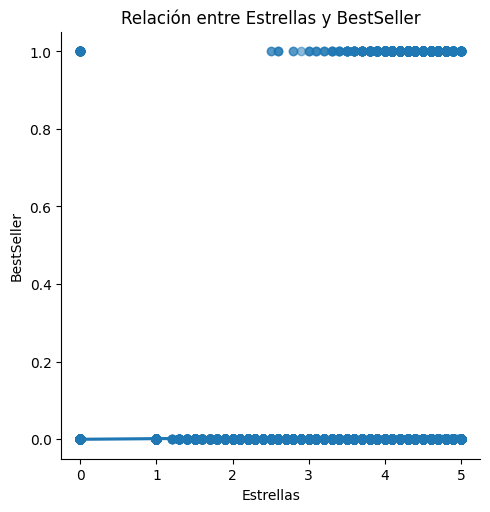

In [26]:
sns.lmplot(x='stars', y='isBestSeller', data=data_f, scatter_kws={'alpha':0.5})
plt.title('Relación entre Estrellas y BestSeller')
plt.xlabel('Estrellas')
plt.ylabel('BestSeller')
plt.show()

Se ve que al considerar todos los datos, al tener varios productos con cero estrellas y/o cero BestSeller la falta de relación es clara.

Realizamos una línea de regresión para tratar de encontrar un patrón entre la cantidad de productos BestSeller y el número de estrellas y encontramos que están poco relacionadas.

In [27]:
#Calcular coeficiente de correlación 

#Valor cerecano a 1 indica correlación positiva fuerte
#Valor cercano a -1 indica correlación negativa fuerte
#Valor cercano a 0 indica que no hay relación significativa

correlation = top_categories['stars'].corr(top_categories['isBestSeller'])
print(f'Coeficiente de correlación: {correlation}')

Coeficiente de correlación: 0.29267131570276267


## Sentencias SQL

In [28]:
#Visualizar las primeras 10 filas de la tabla
conn = sqlite3.connect('amazonstore.db')
cursor = conn.cursor()
query = '''
SELECT * FROM Amaproduct LIMIT 10;
'''
df = pd.read_sql_query(query, conn)
conn.close()
df

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,0,2000,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,0,1000,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,0,300,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,0,400,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,0,400,Suitcases
5,B07XSCD2R4,Maxlite 5 Softside Expandable Luggage with 4 S...,https://m.media-amazon.com/images/I/61LnBNsSBS...,https://www.amazon.com/dp/B07XSCD2R4,4.5,0,144.49,0.00,0,500,Suitcases
6,B07MXF4G8K,"Hard Shell Carry on Luggage Airline Approved, ...",https://m.media-amazon.com/images/I/71CghLYrnA...,https://www.amazon.com/dp/B07MXF4G8K,4.5,0,169.99,0.00,0,400,Suitcases
7,B07H515VCZ,"Maxporter II 30"" Hardside Spinner Trunk Luggag...",https://m.media-amazon.com/images/I/81f3h+YHOX...,https://www.amazon.com/dp/B07H515VCZ,4.5,0,299.99,0.00,0,100,Suitcases
8,B08BXBCNMQ,Omni 2 Hardside Expandable Luggage with Spinne...,https://m.media-amazon.com/images/I/91eOWP4myS...,https://www.amazon.com/dp/B08BXBCNMQ,4.5,0,112.63,137.04,0,500,Suitcases
9,B0B9K44XTS,Luggage Sets Expandable Lightweight Suitcases ...,https://m.media-amazon.com/images/I/81dsv5GrCL...,https://www.amazon.com/dp/B0B9K44XTS,4.4,0,209.99,0.00,0,200,Suitcases


In [29]:
#Contar el número de registros
conn = sqlite3.connect('amazonstore.db')
cursor = conn.cursor()
query = '''
SELECT COUNT(*) FROM Amaproduct;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,COUNT(*)
0,1426337


In [30]:
#verificar que se creo la tabla
conn = sqlite3.connect('amazonstore.db')
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())  

conn.close()



[('Amaproduct',)]


In [31]:
#Precio total de todos los productos en la base de datos
conn = sqlite3.connect('amazonstore.db')
cursor = conn.cursor()
query = '''
SELECT SUM(price) AS TotalPrice FROM Amaproduct;
''' 
df2 = pd.read_sql_query(query, conn)
conn.close()
df2

,TotalPrice
0,61867943.16


In [32]:
#Precios por categoría
conn = sqlite3.connect('amazonstore.db')
cursor = conn.cursor()
query = '''
SELECT category_name, SUM(price) AS TotalPrice
FROM Amaproduct
GROUP BY category_name;
''' 
price_cat = pd.read_sql_query(query, conn)
conn.close()
price_cat

,category_name,TotalPrice
0,Abrasive & Finishing Products,210873.66
1,Accessories & Supplies,170639.12
2,Additive Manufacturing Products,408830.01
3,Arts & Crafts Supplies,111877.35
4,"Arts, Crafts & Sewing Storage",156679.07
...,...,...
243,Women's Watches,534506.07
244,"Xbox 360 Games, Consoles & Accessories",113378.87
245,"Xbox One Games, Consoles & Accessories",107441.06
246,"Xbox Series X & S Consoles, Games & Accessories",144835.21


In [33]:
#productos con precio mayor a 1000
conn = sqlite3.connect('amazonstore.db')
cursor = conn.cursor()
query = '''
SELECT * 
FROM Amaproduct
WHERE price > 1000;
''' 
price_over_1000 = pd.read_sql_query(query, conn)
conn.close()
price_over_1000

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth,category_name
0,B07MMMJP3P,Alpha 3 Extended Trip Expandable 4-Wheeled Pac...,https://m.media-amazon.com/images/I/81t9rYijQV...,https://www.amazon.com/dp/B07MMMJP3P,3.9,0,1395.00,0.0,0,0,Suitcases
1,B07MK2KDF1,Alpha Short Trip Expandable 4-Wheeled Packing ...,https://m.media-amazon.com/images/I/71Dsvyw7El...,https://www.amazon.com/dp/B07MK2KDF1,4.4,0,1195.00,0.0,0,0,Suitcases
2,B07MX2BYB5,Alpha 3 Worldwide Trip Expandable 4-Wheeled Pa...,https://m.media-amazon.com/images/I/81kf9Mm4WI...,https://www.amazon.com/dp/B07MX2BYB5,3.7,0,1495.00,0.0,0,0,Suitcases
3,B07MGGMX8N,Alpha 3 Medium Trip Expandable 4-Wheeled Packi...,https://m.media-amazon.com/images/I/71zKKZJEhV...,https://www.amazon.com/dp/B07MGGMX8N,4.3,0,1295.00,0.0,0,0,Suitcases
4,B0C8BRBK8C,Alpha 3 Short Trip Expandable 4 Wheeled Packin...,https://m.media-amazon.com/images/I/815nE7jFc3...,https://www.amazon.com/dp/B0C8BRBK8C,0.0,0,1195.00,0.0,0,0,Suitcases
...,...,...,...,...,...,...,...,...,...,...,...
3361,B0B3HZJ1NX,Extended Trip Expandable 4 Wheeled Packing Cas...,https://m.media-amazon.com/images/I/71EBeoElaC...,https://www.amazon.com/dp/B0B3HZJ1NX,0.0,0,1195.00,0.0,0,0,Travel Accessories
3362,B09T3BHCQ8,CVT10-M Novastar LED Display Multi-Mode Fiber ...,https://m.media-amazon.com/images/I/41jK4Gw4kG...,https://www.amazon.com/dp/B09T3BHCQ8,0.0,0,1050.00,0.0,0,0,Travel Accessories
3363,B0B3HYDBMR,Extended Trip Expandable 4 Wheeled Packing Cas...,https://m.media-amazon.com/images/I/71K8qsy+KR...,https://www.amazon.com/dp/B0B3HYDBMR,0.0,0,1195.00,0.0,0,0,Travel Accessories
3364,B0C57YC46Q,"Genmitsu CNC Router Machine PROVerXL 4030 V2, ...",https://m.media-amazon.com/images/I/71drskM9iM...,https://www.amazon.com/dp/B0C57YC46Q,5.0,0,1399.00,0.0,0,0,Industrial Power & Hand Tools


In [34]:
#Precio promedio por categoría
conn = sqlite3.connect('amazonstore.db')
cursor = conn.cursor()
query = '''
SELECT category_name, AVG(price) AS Averaprice
FROM Amaproduct
GROUP BY category_name;
''' 
average_per_category = pd.read_sql_query(query, conn)
conn.close()
average_per_category

,category_name,Averaprice
0,Abrasive & Finishing Products,24.389736
1,Accessories & Supplies,40.378400
2,Additive Manufacturing Products,53.659274
3,Arts & Crafts Supplies,13.458120
4,"Arts, Crafts & Sewing Storage",20.637391
...,...,...
243,Women's Watches,81.703771
244,"Xbox 360 Games, Consoles & Accessories",29.766046
245,"Xbox One Games, Consoles & Accessories",29.994712
246,"Xbox Series X & S Consoles, Games & Accessories",25.657256


In [35]:

#Top 10 categorias con mayores precios en total
conn = sqlite3.connect('amazonstore.db')
cursor = conn.cursor()
query = '''
SELECT category_name, SUM(price) AS TotalPrice
FROM Amaproduct
GROUP BY category_name
ORDER BY TotalPrice DESC
LIMIT 10;
''' 
topten_category = pd.read_sql_query(query, conn)
conn.close()
topten_category

,category_name,TotalPrice
0,Computers & Tablets,4553201.97
1,Men's Shoes,1855241.35
2,Men's Watches,1581441.04
3,Women's Shoes,1181527.85
4,Women's Handbags,1060822.95
5,Office Electronics,1041131.99
6,Automotive Performance Parts & Accessories,1007091.35
7,Camera & Photo,990594.70
8,Computers,943934.28
9,Data Storage,943679.96


In [36]:

#Número de productos únicos
conn = sqlite3.connect('amazonstore.db')
cursor = conn.cursor()
query = '''
SELECT COUNT(DISTINCT "asin") AS UniqueProducts
FROM Amaproduct;
''' 
unique_product = pd.read_sql_query(query, conn)
conn.close()
unique_product

,UniqueProducts
0,1426337


In [37]:
#bestSeller por categoría
conn = sqlite3.connect('amazonstore.db')
cursor = conn.cursor()
query = '''
SELECT category_name, SUM(CASE WHEN isBestSeller THEN 1 ELSE 0 END) AS best_sellers_count
FROM Amaproduct
GROUP BY category_name;
''' 
bestseller_by_category_sql = pd.read_sql_query(query, conn)
conn.close()
bestseller_by_category_sql

,category_name,best_sellers_count
0,Abrasive & Finishing Products,17
1,Accessories & Supplies,125
2,Additive Manufacturing Products,7
3,Arts & Crafts Supplies,14
4,"Arts, Crafts & Sewing Storage",9
...,...,...
243,Women's Watches,3
244,"Xbox 360 Games, Consoles & Accessories",10
245,"Xbox One Games, Consoles & Accessories",1
246,"Xbox Series X & S Consoles, Games & Accessories",4


In [38]:
# total productos comprados por categoría el último mes
conn = sqlite3.connect('amazonstore.db')
cursor = conn.cursor()
query = '''
SELECT category_name, SUM(boughtInLastMonth) AS Total_Products_bought_In_Last_Month
FROM Amaproduct
GROUP BY category_name
ORDER BY Total_Products_bought_In_Last_Month DESC;
''' 
prducts_bought_last_month = pd.read_sql_query(query, conn)
conn.close()
prducts_bought_last_month


,category_name,Total_Products_bought_In_Last_Month
0,Kitchen & Dining,10432300
1,Hair Care Products,8012850
2,Industrial & Scientific,7093350
3,Household Cleaning Supplies,6875700
4,Skin Care Products,6612150
...,...,...
243,Smart Home: WiFi and Networking,0
244,Smart Home: Smart Locks and Entry,0
245,Smart Home Thermostats - Compatibility Checker,0
246,Gift Cards,0


In [39]:

#Relación entre bestSeller y precios
conn = sqlite3.connect('amazonstore.db')
cursor = conn.cursor()
query = '''
SELECT category_name, SUM(price) AS Totalprices, SUM(CASE WHEN isBestSeller THEN 1 ELSE 0 END) AS best_sellers_count
FROM Amaproduct
GROUP BY category_name;
''' 
relation_bestseller_price = pd.read_sql_query(query, conn)
conn.close()
relation_bestseller_price 


,category_name,Totalprices,best_sellers_count
0,Abrasive & Finishing Products,210873.66,17
1,Accessories & Supplies,170639.12,125
2,Additive Manufacturing Products,408830.01,7
3,Arts & Crafts Supplies,111877.35,14
4,"Arts, Crafts & Sewing Storage",156679.07,9
...,...,...,...
243,Women's Watches,534506.07,3
244,"Xbox 360 Games, Consoles & Accessories",113378.87,10
245,"Xbox One Games, Consoles & Accessories",107441.06,1
246,"Xbox Series X & S Consoles, Games & Accessories",144835.21,4
